# As NBA scoring increases, so does the number of blowouts (a visual analysis)

#### by Bryan O.

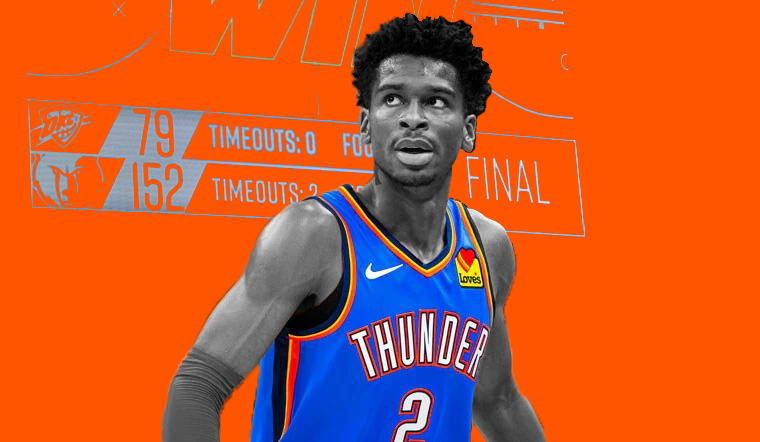

_Featured Image: NBA/Bryan O. Illustration_



If you’ve been watching the NBA for as long as I have, then you’ve probably noticed the increase in scoring over the past decade or more. It is clearly a product of this current 3-point revolution — the emergence of highly efficient, high-volume 3-point shooters, as well as the increased role of analytics in coaching strategy, has resulted in a league where the game is moving just as fast, if not more-so, than it was in the ’70s.

But how does this affect the competitiveness of these games, i.e. the closeness of the scores? We can observe how scoring, margins of victory, and frequency of blowouts are related to each other.

In [143]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

season_log = pd.read_csv("league_pergame_stats.csv") # import Per Game statistics lable

game_log = pd.read_csv("nba_reg_season_2011-22.csv") # import schedule of regular season games from 2011 season to 2022 season
game_log["MoV"] = (game_log["PTS_Visitor"] - game_log["PTS_Home"]).abs() # create margin of victory column

## 1. Threes are Up, Twos are Down

If we take a look at shot attempt trends for different types of shots (overall field goals, 2’s, 3’s, and free throws) since the 2010 season:

In [147]:
# 1. observe different plot sytles in matplotlib
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


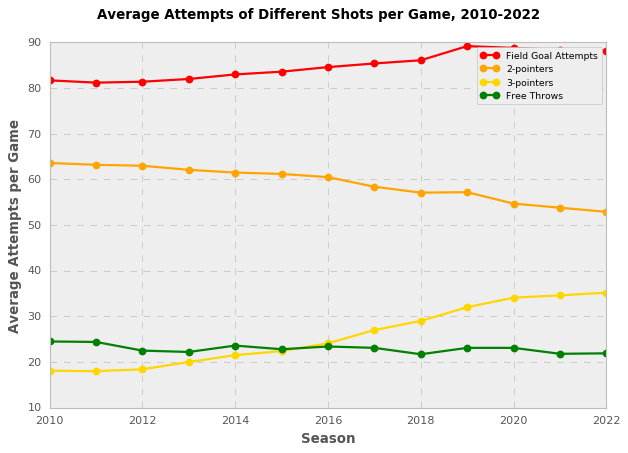

In [209]:
# 2. plot avg per-game attempts from season_log table using "bmh" style
plt.style.use('bmh')
plt.plot(season_log["Yr"], season_log["FGA"], marker = "o", color = "red")
plt.plot(season_log["Yr"], season_log["2PA"], marker = "o", color = "orange")
plt.plot(season_log["Yr"], season_log["3PA"], marker = "o", color = "gold")
plt.plot(season_log["Yr"], season_log["FTA"], marker = "o", color = "green")
plt.legend(["Field Goal Attempts","2-pointers", "3-pointers","Free Throws"], loc = "upper right", fontsize="small")
plt.xlabel("Season", fontweight="bold")
plt.ylabel("Average Attempts per Game", fontweight="bold")
plt.suptitle("Average Attempts of Different Shots per Game, 2010-2022", fontsize = "large", fontweight="bold")
plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
plt.show()

Unsurprisingly, 3-point attempts have increased by almost 100%, while 2-point attempts have fallen from an average of 64 attempts to an average of about 53 attempts. I think the more surprising trend is that average free throw attempts per game has actually decreased. Logically, this makes sense: players typically are less likely to draw fouls on 3-point attempts than on 2-point attempts — defenders tend to be more cautious about fouling behind the arc and potentially giving up a four-point play — so if the number of 2’s falls, then so should the number of free throws. Yet, it can sometimes feel like teams are shooting way more free throws, especially when watching players like James Harden, Trae Young, and Joel Embiid, who draw lots of fouls.

## 2. Margins of Victory are Increasing

One of the biggest consequences of this increase in scoring appears to be an increase in margins of victory. The following chart shows yearly average margins of victory across all 30 teams in the league, and how they’ve changed over time:

In [153]:
# 1. create table aggregating average margin of victory by season
avg_win_margin = game_log[["MoV"]].groupby(game_log["Season"]).mean()
avg_win_margin

,MoV
Season,
2011,10.591870
2012,11.125253
2013,10.990236
2014,10.934959
2015,11.111382
2016,11.089431
2017,11.322764
2018,11.128455
2019,11.739024


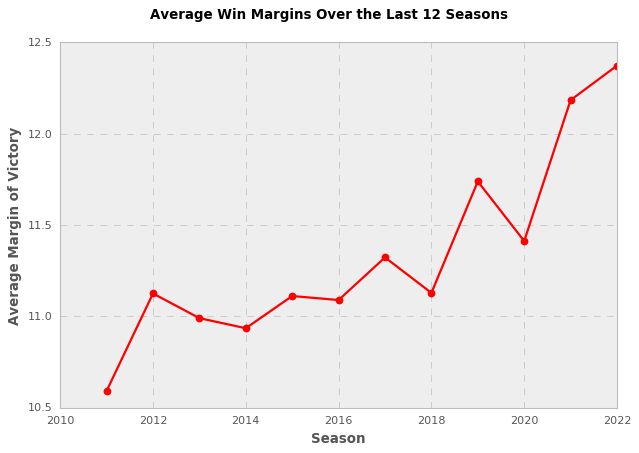

In [198]:
# 2. plot average margins of victory by season
plt.style.use('bmh')
plt.plot(avg_win_margin.index, avg_win_margin["MoV"], marker = "o", color="red")
plt.xlabel("Season", fontweight="bold")
plt.ylabel("Average Margin of Victory", fontweight="bold")
plt.suptitle("Average Win Margins Over the Last 12 Seasons", fontweight="bold",fontsize = "large")
plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
plt.show()

The average margin of victory has increased by almost 19% over the course of 12 seasons.

We can see how increased scoring has affected the way that point differentials are distributed. Below is a series of histograms of the margins of victory from the 2011 season up to this past season (2022).

In [156]:
# 1. separate game_log for each season
game_log_2011 = game_log[game_log["Season"]==2011]
game_log_2012 = game_log[game_log["Season"]==2012]
game_log_2013 = game_log[game_log["Season"]==2013]
game_log_2014 = game_log[game_log["Season"]==2014]
game_log_2015 = game_log[game_log["Season"]==2015]
game_log_2016 = game_log[game_log["Season"]==2016]
game_log_2017 = game_log[game_log["Season"]==2017]
game_log_2018 = game_log[game_log["Season"]==2018]
game_log_2019 = game_log[game_log["Season"]==2019]
game_log_2020 = game_log[game_log["Season"]==2020]
game_log_2021 = game_log[game_log["Season"]==2021]
game_log_2022 = game_log[game_log["Season"]==2022]

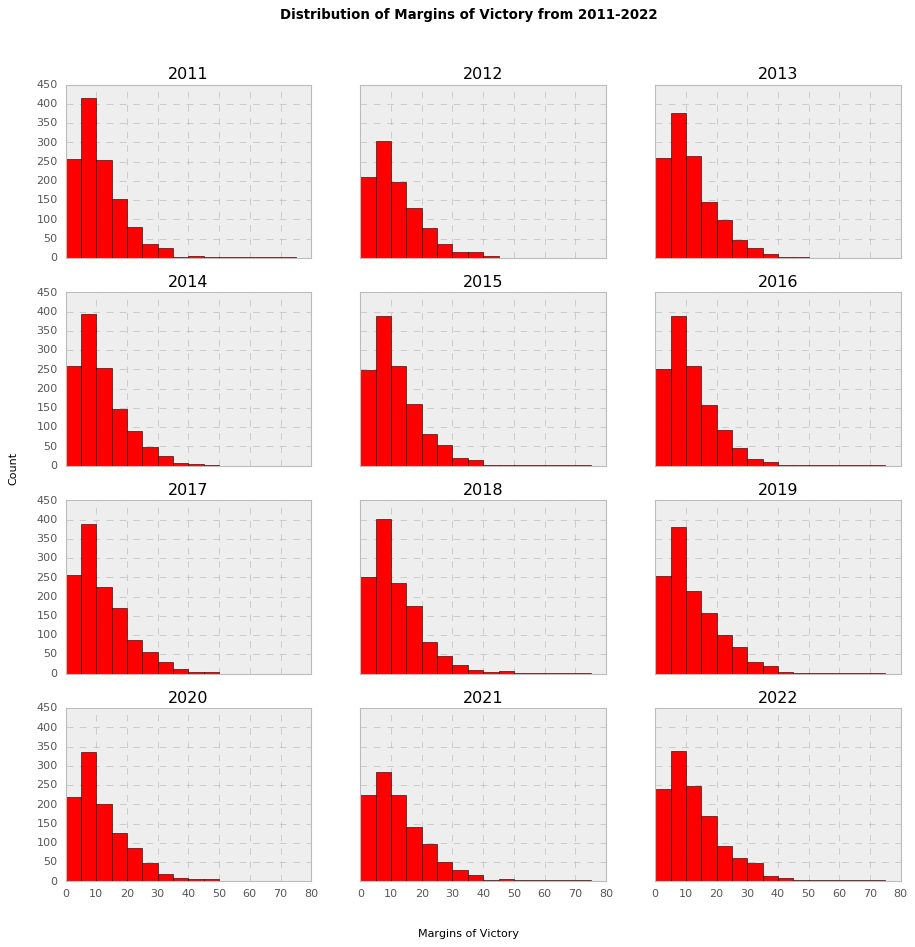

In [222]:
# 2. create small multiples
plt.style.use('bmh')
fig, ax = plt.subplots(4, 3, figsize=(12,12), sharex=True, sharey=True)
ax[0,0].hist(game_log_2011["MoV"], color = "red", edgecolor="black", bins=[0,5,10,15,20,25,30,35,40,45,50,75])
ax[0,0].set_title("2011")
ax[0,1].hist(game_log_2012["MoV"], color = "red", edgecolor="black", bins=[0,5,10,15,20,25,30,35,40,45,50,75])
ax[0,1].set_title("2012")
ax[0,2].hist(game_log_2013["MoV"], color = "red", edgecolor="black", bins=[0,5,10,15,20,25,30,35,40,45,50,75])
ax[0,2].set_title("2013")
ax[1,0].hist(game_log_2014["MoV"], color = "red", edgecolor="black", bins=[0,5,10,15,20,25,30,35,40,45,50,75])
ax[1,0].set_title("2014")
ax[1,1].hist(game_log_2015["MoV"], color = "red", edgecolor="black", bins=[0,5,10,15,20,25,30,35,40,45,50,75])
ax[1,1].set_title("2015")
ax[1,2].hist(game_log_2016["MoV"], color = "red", edgecolor="black", bins=[0,5,10,15,20,25,30,35,40,45,50,75])
ax[1,2].set_title("2016")
ax[2,0].hist(game_log_2017["MoV"], color = "red", edgecolor="black", bins=[0,5,10,15,20,25,30,35,40,45,50,75])
ax[2,0].set_title("2017")
ax[2,1].hist(game_log_2018["MoV"], color = "red", edgecolor="black", bins=[0,5,10,15,20,25,30,35,40,45,50,75])
ax[2,1].set_title("2018")
ax[2,2].hist(game_log_2019["MoV"], color = "red", edgecolor="black", bins=[0,5,10,15,20,25,30,35,40,45,50,75])
ax[2,2].set_title("2019")
ax[3,0].hist(game_log_2020["MoV"], color = "red", edgecolor="black", bins=[0,5,10,15,20,25,30,35,40,45,50,75])
ax[3,0].set_title("2020")
ax[3,1].hist(game_log_2021["MoV"], color = "red", edgecolor="black", bins=[0,5,10,15,20,25,30,35,40,45,50,75])
ax[3,1].set_title("2021")
ax[3,2].hist(game_log_2022["MoV"], color = "red", edgecolor="black", bins=[0,5,10,15,20,25,30,35,40,45,50,75])
ax[3,2].set_title("2022")
fig.suptitle("Distribution of Margins of Victory from 2011-2022", fontweight="bold",fontsize = "large")
fig.supxlabel("Margins of Victory")
fig.supylabel("Count")
plt.show()

While most of the plots look similar, we can see that the number of games decided by 6-10 points decreases by a lot from 2011-2022. Additionally, there’s also many more games decided by 21-35 points than there were in 2011.

## 3. 2022 had the highest percentage of blowouts in the last decade, as well as the biggest blowout of all time

Let’s focus in on the 2022 season and observe more closely how all 1230 games were distributed, in terms of margins of victory:

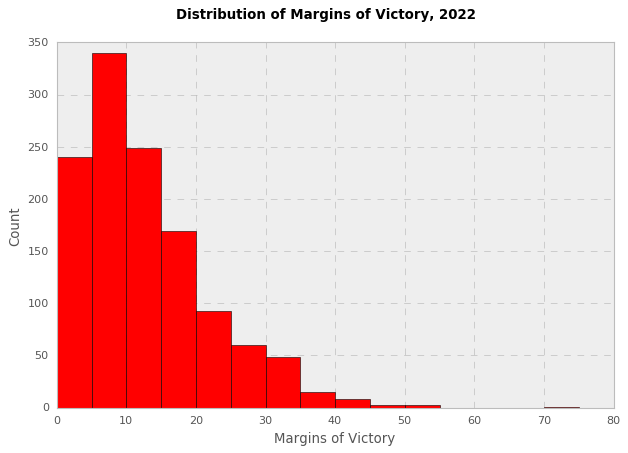

In [213]:
# create histogram for only 2022
plt.hist(game_log_2022["MoV"], color = "red", edgecolor="black",bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75])
plt.xlabel("Margins of Victory")
plt.ylabel("Count")
plt.suptitle("Distribution of Margins of Victory, 2022", fontweight="bold", fontsize = "large")
plt.show()

2022 had multiple games with margins of victory of 40+ points, including three games decided by over 50 points. A singular game, Memphis Grizzlies vs Oklahoma City Thunder, was decided by 73 points — the biggest blowout in the history of the NBA.

In [259]:
# Show Top 10 biggest blowouts of 2022
top_10_blowouts = game_log[game_log["Season"]==2022].sort_values("MoV", ascending=False).head(10).drop(["Date","Start (ET)","OT?","Attend.","Notes","Season"], axis="columns")
top_10_blowouts

,Visitor/Neutral,PTS_Visitor,Home/Neutral,PTS_Home,Arena,MoV
13297,Oklahoma City Thunder,79,Memphis Grizzlies,152,FedEx Forum,73
13676,Sacramento Kings,75,Boston Celtics,128,TD Garden,53
14194,Oklahoma City Thunder,88,Los Angeles Clippers,138,Crypto.com Arena,50
14176,Portland Trail Blazers,78,Dallas Mavericks,128,American Airlines Center,50
13830,Boston Celtics,135,Philadelphia 76ers,87,Wells Fargo Center,48
13572,Detroit Pistons,87,Chicago Bulls,133,United Center,46
13452,Toronto Raptors,99,Cleveland Cavaliers,144,Rocket Mortgage Fieldhouse,45
13212,Memphis Grizzlies,95,Minnesota Timberwolves,138,Target Center,43
13936,Portland Trail Blazers,81,Minnesota Timberwolves,124,Target Center,43
12982,Milwaukee Bucks,95,Miami Heat,137,FTX Arena,42


And if we calculate the number of games decided by more than 20 points, and compare them across seasons from 2011-2022, we will find that the 2021 and 2022 seasons both had ~17% of the regular season games decided by more than 20.

In [258]:
# 1. get the count of games that were won by more than 20 points
blowouts = game_log[game_log["MoV"]>20].groupby(game_log["Season"]).count().filter(["MoV"], axis="columns")

# 2. get the percentage of those games out of the full schedule
game_count = game_log[["Season"]].value_counts()
blowouts = blowouts.merge(game_count.to_frame(), how="left", on="Season")
blowouts["Blowout %"] = blowouts["MoV"]/blowouts[0]
blowouts = blowouts.rename(columns={"MoV": "# of Blowouts", 0: "Total Games", "Blowout %":"Blowout %" })
blowouts

,# of Blowouts,Total Games,Blowout %
Season,,,
2011,134,1230,0.108943
2012,131,990,0.132323
2013,161,1229,0.131001
2014,159,1230,0.129268
2015,155,1230,0.126016
2016,144,1230,0.117073
2017,164,1230,0.133333
2018,154,1230,0.125203
2019,196,1230,0.159350


So the trends are pretty clear: as scoring increases, so does the average margin of victory. And as the average margin of victory increases, so does the number of blowouts.

***

_*Note: the above data analyses pertains to scoring in the regular season and does not include data from the preseason or postseason. All data comes from Basketball Reference._